<a href="https://colab.research.google.com/github/soulaimane2/Fashion_MNIST_ANN/blob/master/Fashion_MNIST_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds



print(tf.__version__)

2.2.0


In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
len(train_images)

60000

In [0]:
train_labels.shape

(60000,)

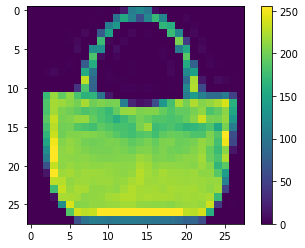

In [0]:
plt.figure()
plt.imshow(train_images[100])
plt.colorbar()
plt.grid(False)
plt.show()

In [0]:
train_images = train_images / 255.
test_images = test_images / 255.

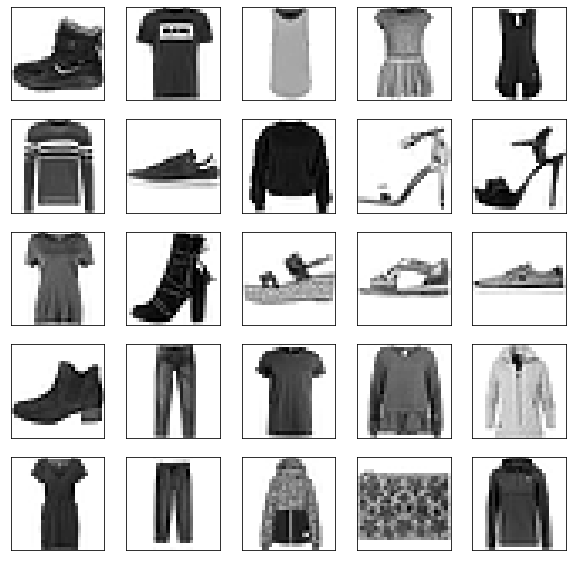

In [0]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    #plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
model = keras.Sequential([
                             keras.layers.Flatten(input_shape=(28,28)),
                             keras.layers.Dense(128, activation='relu'),
                            keras.layers.Dense(128,activation='relu'),
                  keras.layers.Dense(10)
])

In [0]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4885 - accuracy: 0.8259
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3654 - accuracy: 0.8676
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3287 - accuracy: 0.8790
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3056 - accuracy: 0.8867
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2876 - accuracy: 0.8947
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2727 - accuracy: 0.8978
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2596 - accuracy: 0.9023
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2506 - accuracy: 0.9055
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2387 - accuracy: 0.9094
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.232

In [0]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3296 - accuracy: 0.8862

Test accuracy: 0.8862000107765198


In [0]:
# probability model
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [0]:
predictions = probability_model.predict(test_images)

In [0]:
predictions[0]

array([3.9014402e-08, 6.9341213e-06, 6.4377879e-08, 6.3307266e-09,
       1.5095583e-06, 1.6154126e-03, 1.1234594e-06, 3.8499825e-02,
       2.8427640e-09, 9.5987517e-01], dtype=float32)

In [0]:
p = np.argmax(predictions[5])

In [0]:
print("The item is a : ",format(class_names[p]))

The item is a :  Trouser


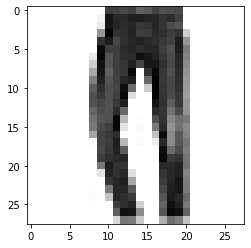

In [0]:
i = 5
plt.figure()
plt.imshow(test_images[i], cmap=plt.cm.binary)

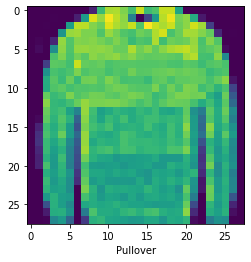

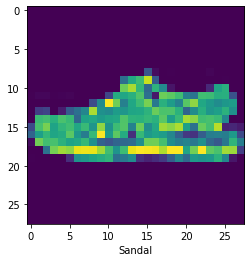

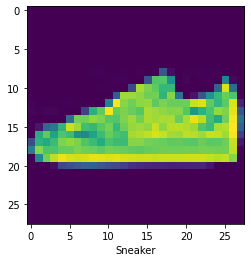

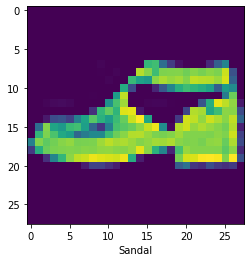

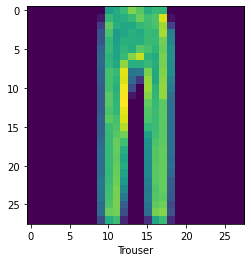

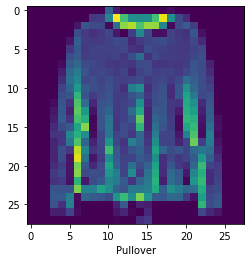

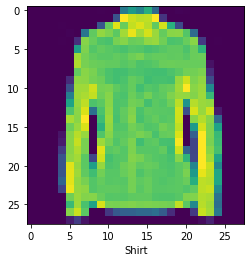

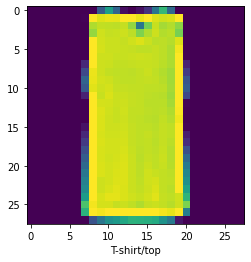

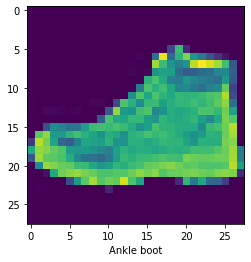

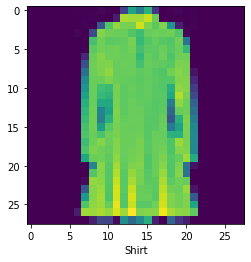

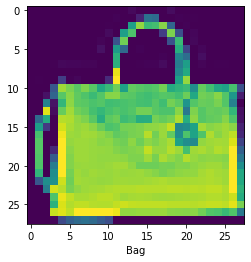

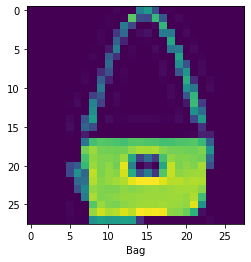

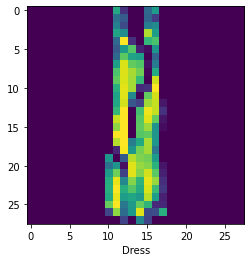

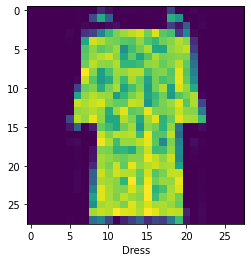

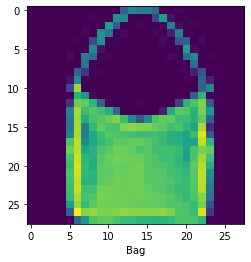

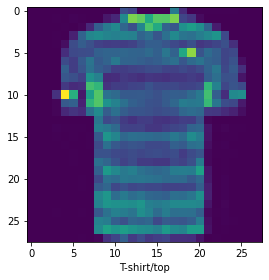

In [0]:
num_rows = 5
num_cols = 3

for i in range(20,36):
  x = np.argmax(predictions[i])
  plt.figure()
  plt.xlabel(class_names[x])
  plt.imshow(test_images[i])

plt.tight_layout()    
plt.show()